In [1]:
# Classifiers comparison: decision trees and k-nearest neighbors on the dataset Iris

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import neighbors
from lab_2_utils import print_decorated
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# DecisionTreeClassifier: Review, Cross Validation and accuracy scores
iris = load_iris()
clf = tree.DecisionTreeClassifier(
    criterion="entropy",
    random_state=300,
    min_samples_leaf=5,
    class_weight={0: 1, 1: 1, 2: 1})
accuracy_scores = cross_val_score(clf, iris.data, iris.target, cv=5)
print_decorated('Decision Tree Classifier - accuracy scores', accuracy_scores)


#######################################################################################
Decision Tree Classifier - accuracy scores :  [0.96666667 1.         0.86666667 0.86666667 1.        ]


In [6]:
"""
k-NN: KNeighborsClassifier: uniform weights
Cross Validation and accuracy scores
"""
n_neighbors = 11
clf_knn = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
clf_knn = clf_knn.fit(iris.data, iris.target)
accuracy_scores = cross_val_score(clf_knn, iris.data, iris.target, cv=5)
print_decorated('k-NN with uniform weights:  accuracy scores', accuracy_scores)

# print FALSE predictions: 4 errors
print_decorated("Shows the Error model predictions", 0)
for i in range(len(iris.target)):  # for each example in dataset (150)
    instance = iris.data[i, :].reshape(1, -1)  # e.g. [[5.1 3.5 1.4 0.2]]
    predicted = clf_knn.predict(instance)[0]  # e.g. 0 (predicted class)
    if iris.target[i] != predicted:
        print("Instance: #", str(i), " - ", instance)
        print("Predicted class: ", predicted)
        print("Predicted ko\n" + "True class: " +
              str(iris.target_names[iris.target[i]])
              + "; predicted: " + str(iris.target_names[predicted]))
        print('#######################################################################################')



#######################################################################################
k-NN with uniform weights:  accuracy scores :  [0.93333333 1.         1.         0.96666667 1.        ]

#######################################################################################
Shows the Error model predictions :  0
Instance: # 77  -  [[6.7 3.  5.  1.7]]
Predicted class:  2
Predicted ko
True class: versicolor; predicted: virginica
#######################################################################################
Instance: # 83  -  [[6.  2.7 5.1 1.6]]
Predicted class:  2
Predicted ko
True class: versicolor; predicted: virginica
#######################################################################################
Instance: # 106  -  [[4.9 2.5 4.5 1.7]]
Predicted class:  1
Predicted ko
True class: virginica; predicted: versicolor
#######################################################################################
Instance: # 138  -  [[6.  3.  4.8 1.8]]
Predicted class:  1
Pre

In [8]:
"""
k-NN: KNeighborsClassifier: distance weights
Cross Validation and accuracy scores
"""
n_neighbors = 11
clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf_knn2.fit(iris.data, iris.target)
accuracy_scores_knn_distance_weights = cross_val_score(clf_knn2,
                                                       iris.data,
                                                       iris.target,
                                                       cv=5,
                                                       scoring='accuracy')
print_decorated('k-NN with distance weights: accuracy scores',
                accuracy_scores_knn_distance_weights)
# print FALSE predictions: 0 errors
for i in range(len(iris.target)):
    instance = (iris.data[i, :]).reshape(1, -1)
    predicted_knn_distance_weights = clf_knn2.predict(instance)[0]
    if iris.target[i] != predicted_knn_distance_weights:
        print(str(i) + " nok " + "true class: " + str(iris.target_names[iris.target[i]]) + "; predicted: " + str(
            iris.target_names[predicted_knn_distance_weights]))


#######################################################################################
k-NN with distance weights: accuracy scores :  [0.96666667 1.         1.         0.96666667 1.        ]


In [13]:
"""
TUNING k PARAMETER (K = key: neighbors)
Find the best value of k (maximum accuracy)
"""
print_decorated("TUNING k PARAMETER (K = key: neighbors)", "Find the best value of k (maximum accuracy)")
# split dataset to training set and test set
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)
# init best_accuracy and best_k
best_accuracy = 0
best_k = 1
# array for store accuracies
# for each example of training set, you want a value of accuracy
# len(y_train) = 90
# init with array of 90 elements with value = 0
Accuracy_array = np.zeros(len(y_train), dtype=float)
print("init Accuracy Array\n", Accuracy_array)
print("-------------------------------------------------------------------------")
# all k neighbors to test (from 1 neighbors to 90 neighbors)
print("init k neighbors Array (k = 1, k = 2, ..., k = 90)\n", Accuracy_array)
print(np.arange(1, len(y_train) + 1))
print("-------------------------------------------------------------------------")
for n_neighbors in np.arange(1, len(y_train) + 1):
    # k-nn classification, model fitting, accuracy scoring and save to accuracy_array
    clf_knn3 = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
    clf_knn3.fit(X_train, y_train)
    # save accuracy in Accuracy_array
    index = n_neighbors - 1
    Accuracy_array[index] = clf_knn3.score(X_test, y_test)
    # update best_accuracy and best_k if best_accuracy
    if best_accuracy < clf_knn3.score(X_test, y_test):
        best_accuracy = clf_knn3.score(X_test, y_test)
        best_k = n_neighbors

print("k neighbors Array after tuning (k = 1, k = 2, ..., k = 90)\n", Accuracy_array)
print("-------------------------------------------------------------------------")
print("best k="+str(best_k))  # k = 7 = best split
print("best accuracy="+str(best_accuracy))  # best accuracy = 0.9666666666666667


#######################################################################################
TUNING k PARAMETER (K = key: neighbors) :  Find the best value of k (maximum accuracy)
init Accuracy Array
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
-------------------------------------------------------------------------
init k neighbors Array (k = 1, k = 2, ..., k = 90)
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42


#######################################################################################
Matplotlib for view ticker :  
y ticks:  [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90]
[0.91666667 0.91666667 0.93333333 0.91666667 0.95       0.93333333
 0.96666667 0.93333

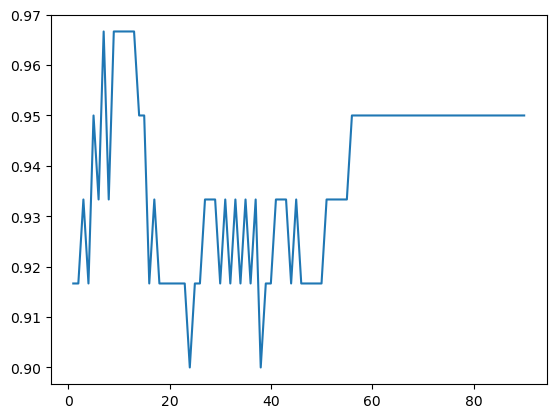

In [16]:
"""
Matplotlib for view ticker
"""
print_decorated("Matplotlib for view ticker", "")
# yticks = label of y-axis
print("y ticks: ", np.arange(0.0, 1.0, 0.01))
plt.yticks(np.arange(0.0, 1.0, 0.01))
# plot accuracy
# associate k neighbors to test (e.g. index 1) with its accuracy value
# best k = 7
print(np.arange(1, len(y_train)+1))
print(Accuracy_array)
plt.plot(np.arange(1, len(y_train)+1), Accuracy_array)
plt.show()


#######################################################################################
Data visualization :  in the same plot view two kind of weighting of the vote of the neighbours: uniform and distance
weighting:uniform
best k=7
best accuracy=0.9666666666666667
-------------------------------------------------------------------------
weighting:distance
best k=7
best accuracy=0.9666666666666667
-------------------------------------------------------------------------


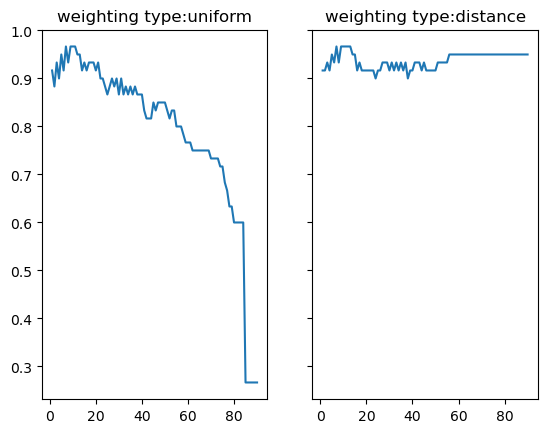

In [18]:
"""
Data visualization: in the same plot 
view two kind of weighting of the vote of the neighbours:
uniform and distance
"""
print_decorated("Data visualization",
                "in the same plot view two kind of weighting of the vote of the neighbours: uniform and distance")
X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    test_size=0.4,
                                                    random_state=0)
i = 0
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
for weight_type in ['uniform', 'distance']:
    print("weighting:" + str(weight_type))
    # array for storing accuracies
    A = np.zeros(len(y_train), dtype=float)
    best_accuracy = 0
    best_k = 1
    for n_neighbors in np.arange(1, len(y_train) + 1):
        clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights=weight_type)
        clf_knn2.fit(X_train, y_train)
        index = n_neighbors - 1
        A[index] = clf_knn2.score(X_test, y_test)
        if best_accuracy < clf_knn2.score(X_test, y_test):
            best_accuracy = clf_knn2.score(X_test, y_test)
            best_k = n_neighbors

    print("best k=" + str(best_k))
    print("best accuracy=" + str(best_accuracy))
    if i == 0:
        ax1.plot(np.arange(1, len(y_train) + 1), A)
        ax1.set_title('weighting type:' + str(weight_type))
    else:
        ax2.plot(np.arange(1, len(y_train) + 1), A)
        ax2.set_title('weighting type:' + str(weight_type))
    i = i + 1
    print("-------------------------------------------------------------------------")

plt.show()


#######################################################################################
Data visualization :  in the same picture view two kind of weighting of the vote of the neighbours: uniform and distance
weighting:uniform
best k=7
best accuracy=0.9666666666666667
-------------------------------------------------------------------------
weighting:distance
best k=7
best accuracy=0.9666666666666667
-------------------------------------------------------------------------


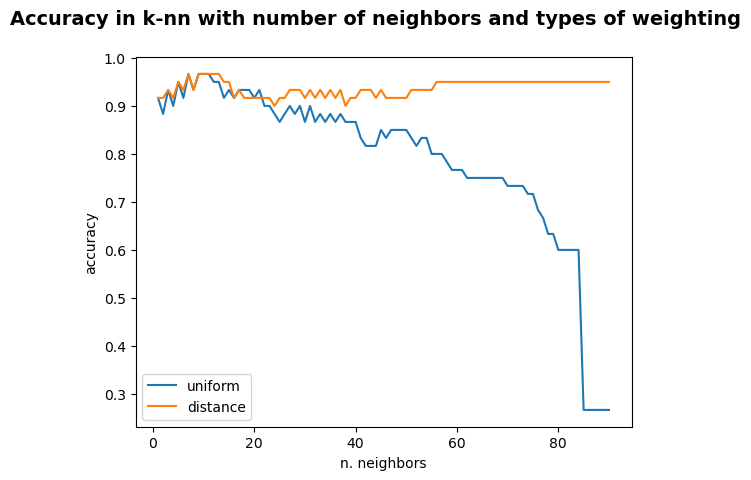

In [19]:
"""
Data visualization: in the same PICTURE (GRAPH) 
view two kind of weighting of the vote of the neighbours:
uniform and distance
"""
print_decorated("Data visualization",
                "in the same picture view two kind of weighting of the vote of the neighbours: uniform and distance")

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

fig = plt.figure()
fig.suptitle('Accuracy in k-nn with number of neighbors and types of weighting', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.set_xlabel('n. neighbors')
ax.set_ylabel('accuracy')

A = np.zeros((len(y_train), 2), dtype=float)
i = 0
best_accuracy = 0
for weight_type in ['uniform', 'distance']:
    print("weighting:" + str(weight_type))
    best_accuracy = 0
    best_k = 1
    for n_neighbors in np.arange(1, len(y_train) + 1):
        clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights=weight_type)
        clf_knn2.fit(X_train, y_train)
        index = n_neighbors - 1  # computes the matrix row index
        A[index, i] = clf_knn2.score(X_test, y_test)
        if best_accuracy < clf_knn2.score(X_test, y_test):
            best_accuracy = clf_knn2.score(X_test, y_test)
            best_k = n_neighbors

    print("best k=" + str(best_k))
    print("best accuracy=" + str(best_accuracy))
    plt.plot(np.arange(1, len(y_train) + 1), A[:, i])
    i = i + 1
    print("-------------------------------------------------------------------------")

plt.legend(['uniform', 'distance'], loc='lower left')
plt.show()

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

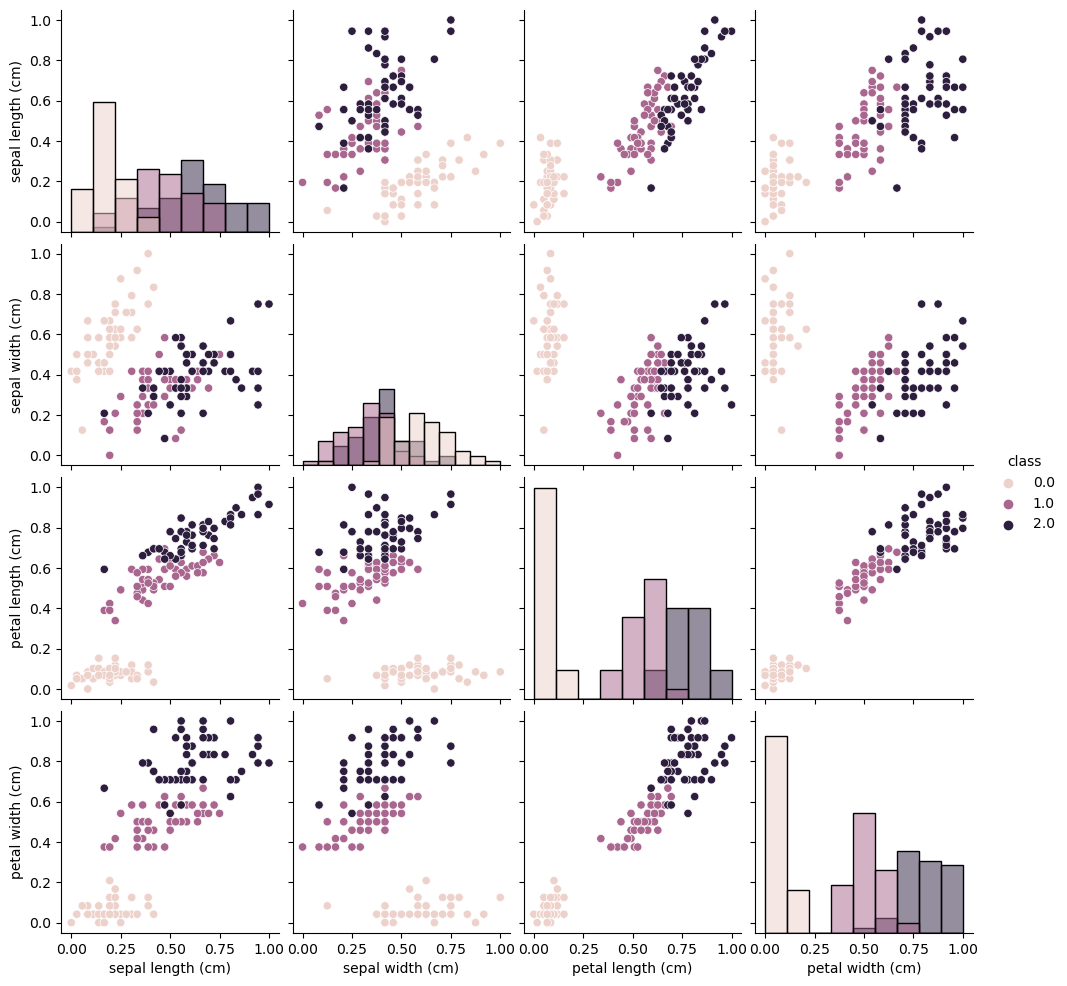

In [100]:
"""
EXERCISE 1:
Plot the Iris dataset, in 2-D, with a 
red color for Setosa, 
blu for Versicolor, 
green for Virginica.
show scatter plot (in 2D): choosing 2 of the 4 features
Feature Analysis
features: sepal length(cm), sepal width(cm), petal length (cm), petal width (cm)
choosing a features that contribute the most to the output feature for use in model construction
"""
from sklearn import datasets
import pandas as pd
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

iris = datasets.load_iris()
target = datasets.load_iris().target

features_name = iris.feature_names;
target = iris.target

# convert to dataframe for processing
iris = pd.DataFrame(iris.data, columns = features_name)
print(iris)
# dataset histogram: 50 examplas for each class (0, 1, 2)
print(target)
# plt.hist(target)

# Feature Analysis
# normalize and viusalize feature’s correlations with classes
#to normalize dataset, we use this handy MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(iris)
iris_norm=scaler.transform(iris)
# visualizing features and target
iris_norm = pd.DataFrame(iris_norm, columns = iris.columns)
iris_norm_ = pd.DataFrame(np.hstack((iris_norm, target[:, np.newaxis])), columns = iris.columns.tolist() + ['class'])
sns.pairplot(iris_norm_, hue = 'class', diag_kind='hist')
# Results: can separate 3 classes very clear: sepal width/sepal length.
# Class 1 and class 2 are tangled in the chart

     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
     0    1    2    3  target
0  5.1  3.5  1.4  0.2       0
1  4.9  3.0  1.4  0.2       0
2  4.7  3.2  1.3  0.2       0
3  4.6  3.1  1.5  0.2       0
4  5.0  3.6  1.4  0.2       0
Checking the correlation with method pearson
                0         1         2         3    target
0       1.000000 -0.117570  0.871754  0.817941  0.782561
1      -0.117570  1.000000 -0.428440 -0.366126 -0.426658
2       0.871754 -0.428440  1.000000  0.962865  0.949035
3       0.817941 -0.366126  0.962865  1.000000  0.956547
target  0.782561 -0.426658  0.949035  0.956547  1.0

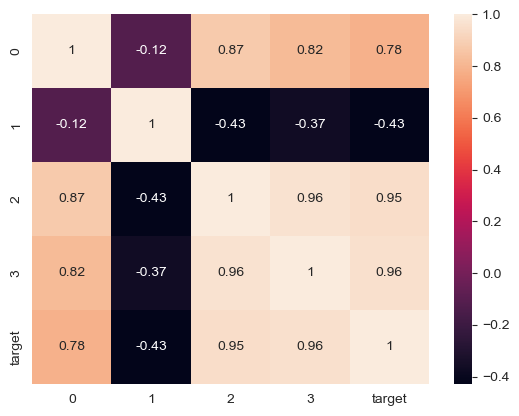

In [63]:
"""
Feature Analysis
features: sepal length(cm), sepal width(cm), petal length (cm), petal width (cm)
choosing a features that contribute the most to the output feature for use in model construction
"""
from sklearn.datasets import load_iris
import pandas as pd
from lab_2_utils import print_decorated
from matplotlib import pyplot as plt
import seaborn as sns

iris = load_iris()
df = pd.DataFrame(iris.data)
print(df.head(5))  # print first 5 rows

# add column target
print(iris.target)
df["target"] = iris.target
print(df.head(5))

# checking the correlation with method pearson
corr = df.corr(method='pearson')
print("Checking the correlation with method pearson\n", corr)
corr = df.corr(method='pearson')['target']
print("FEATURES AND TARGET correlation: checking the correlation with method pearson\n", corr)

sns.heatmap(df.corr(method='pearson'), annot=True)
plt.show()

In [53]:
"""
feature selection with Chi-Square Testd
test = Summation (Observed Value - Expected Value) / Expected Value
somma(valore osservato - valore atteso) / valore atteso
se il p-value è inferire a 0.05, allora rifiutiamo l'ipotesi nulla
e andiamo con l'ipotesi alternativa
"""
from sklearn.feature_selection import SelectKBest, chi2

# featues Data
X = df.drop("target", axis=1)
# classes/target Data
y = df.target

# chi2 test for features selection (select 2 best features correlation with target Y)
model = SelectKBest(chi2, k=2)
model = model.fit(X, y)

# features 2 and 3: petal length (cm), petal width (cm) 
print("Features data before selection\n", X)
X_after_selection = model.transform(X)
print("Features data after selection\n", X_after_selection)

Features data before selection
        0    1    2    3
0    5.1  3.5  1.4  0.2
1    4.9  3.0  1.4  0.2
2    4.7  3.2  1.3  0.2
3    4.6  3.1  1.5  0.2
4    5.0  3.6  1.4  0.2
..   ...  ...  ...  ...
145  6.7  3.0  5.2  2.3
146  6.3  2.5  5.0  1.9
147  6.5  3.0  5.2  2.0
148  6.2  3.4  5.4  2.3
149  5.9  3.0  5.1  1.8

[150 rows x 4 columns]
Features data after selection
 [[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.2 0.2]
 [1.3 0.2]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6

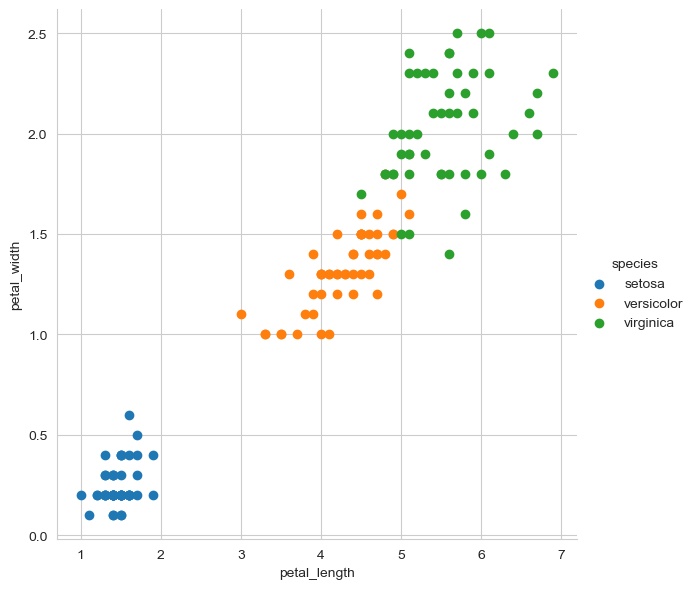

In [60]:
"""
Plot with SEABORN LIBRARY
Plot the Iris dataset, in 2-D, with a red color for Setosa, blu for Versicolor, green for Virginica.
['setosa' 'versicolor' 'virginica']
features: sepal length(cm), sepal width (cm), petal length (cm), petal width (cm)
features selection: petal length (cm), petal width (cm)
"""
iris = sns.load_dataset('iris')
sns.FacetGrid(iris, hue ="species", height = 6).map(plt.scatter,'petal_length', 'petal_width').add_legend()

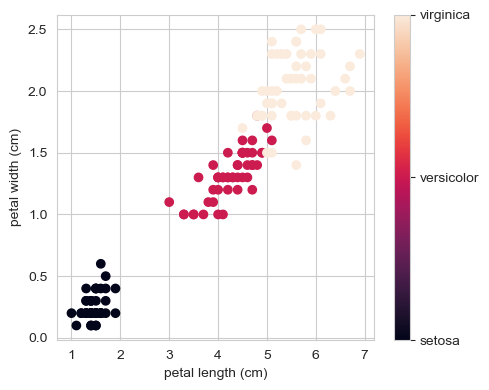

In [61]:
"""
Plot with matplotlib
Plot the Iris dataset, in 2-D, with a red color for Setosa, blu for Versicolor, green for Virginica.
['setosa' 'versicolor' 'virginica']
features: sepal length(cm), sepal width (cm), petal length (cm), petal width (cm)
features selection: petal length (cm), petal width (cm)
"""
iris = load_iris()
# The indices of the features that we are plotting (class 0 & 1)
x_index = 2 # petal length (cm)
y_index = 3 # petal width (cm)
# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.tight_layout()
plt.show()

Accuracy: 0.9666666666666667
TRAINING SET (90 examples):
Predicted classes for 90 examples [1 0 2 1 1 1 1 2 0 0 2 1 0 0 1 0 2 1 0 1 2 1 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0
 0 2 0 0 0 1 2 2 0 0 0 1 1 0 0 1 0 2 1 2 1 0 2 0 2 0 0 2 0 2 1 1 1 2 2 1 1
 0 1 2 2 0 1 1 1 1 0 0 0 2 1 2 0]


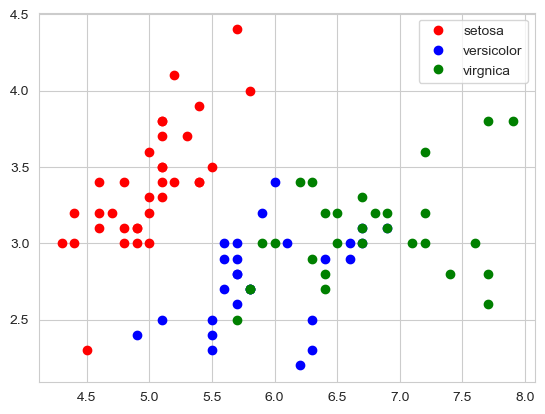

----------------------------------------------------------------------------------------------
TEST SET (60 examples):
Predicted classes for 60 examples [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 1 2 1 2]


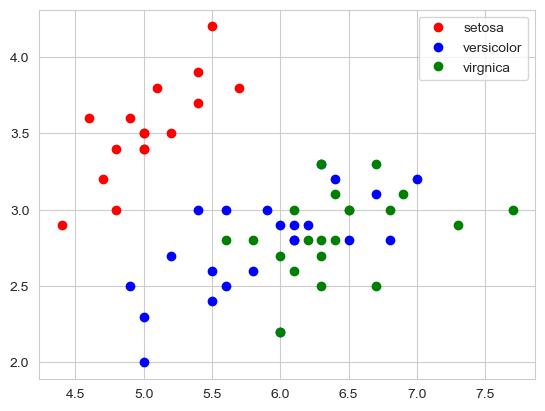

In [103]:
"""
EXSERCISE 2
Show a scatter plot similar to the previous one, 
but now the color of the points is determined by the class estimated by k-nn, 
with a value of k of your choice.
"""
from sklearn import neighbors
from sklearn.model_selection import train_test_split
iris = load_iris()
# training set = 90 examples
# test set = 0.4 = 60 examples
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)
n_neighbors = 7 # best value of k (maximum accuracy)
# k-nn classification, model fitting and accuracy scoring
clf_knn = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf_knn = clf_knn.fit(X_train, y_train)
print("Accuracy:" , clf_knn.score(X_test, y_test))

# TRAINING SET
print("TRAINING SET (90 examples):")
predicted_classes_training_set = clf_knn.predict(X_train)
print("Predicted classes for 90 examples", predicted_classes_training_set)
# get index of setosa, versicolor and virginica in predicted class array
indices_of_setosa_training = [i for i in range(predicted_classes_training_set.size) if predicted_classes_training_set[i] == 0]
indices_of_versicolor_training = [i for i in range(predicted_classes_training_set.size) if predicted_classes_training_set[i] == 1]
indices_of_virginica_training = [i for i in range(predicted_classes_training_set.size) if predicted_classes_training_set[i] == 2]
# show a scatter plot
plt.figure()
plt.plot(X_train[indices_of_setosa_training,0],X_train[indices_of_setosa_training,1],"ro",label="setosa") # plot x and y using red circle markers
plt.plot(X_train[indices_of_versicolor_training,0],X_train[indices_of_versicolor_training,1],"bo",label="versicolor") # plot x and y using blue circle markers
plt.plot(X_train[indices_of_virginica_training,0],X_train[indices_of_virginica_training,1],"go",label="virgnica") # plot x and y using green circle markers
plt.legend()
plt.show()

# TEST SET
print("----------------------------------------------------------------------------------------------\nTEST SET (60 examples):")
predicted_classes_test_set = clf_knn.predict(X_test)
print("Predicted classes for 60 examples", predicted_classes_test_set)
# get index of setosa, versicolor and virginica in predicted class array
indices_of_setosa_test = [i for i in range(predicted_classes_test_set.size) if predicted_classes_test_set[i] == 0]
indices_of_versicolor_test = [i for i in range(predicted_classes_test_set.size) if predicted_classes_test_set[i] == 1]
indices_of_virginica_test = [i for i in range(predicted_classes_test_set.size) if predicted_classes_test_set[i] == 2]
# show a scatter plot
plt.figure()
plt.plot(X_test[indices_of_setosa_test,0],X_test[indices_of_setosa_test,1],"ro",label="setosa") # plot x and y using red circle markers
plt.plot(X_test[indices_of_versicolor_test,0],X_test[indices_of_versicolor_test,1],"bo",label="versicolor") # plot x and y using blue circle markers
plt.plot(X_test[indices_of_virginica_test,0],X_test[indices_of_virginica_test,1],"go",label="virgnica") # plot x and y using green circle markers
plt.legend()
plt.show()

DECISION TREE CLASSIFIER: TEST SET predictions [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 2 1 0 1 2 1 0
 2 1 1 2 0 2 0 0 1 2 2 1 2 1 2 1 1 1 2 1 1 1 2]
DECISION TREE CLASSIFIER: Test Set Accuracy: 0.8666666666666667
--------------------------------------------------------------------------------------------
k-NN CLASSIFIER: TEST SET predictions [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 1 2 1 2]
k-NN CLASSIFIER: Test Set Accuracy: 0.9666666666666667


[Text(0.5, 0, 'FPR'), Text(0, 0.5, 'TPR')]

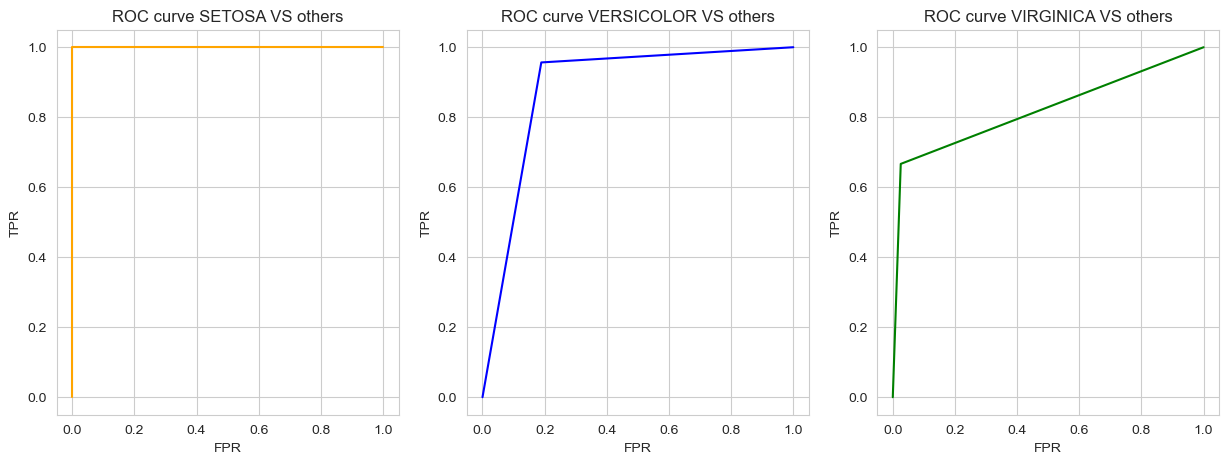

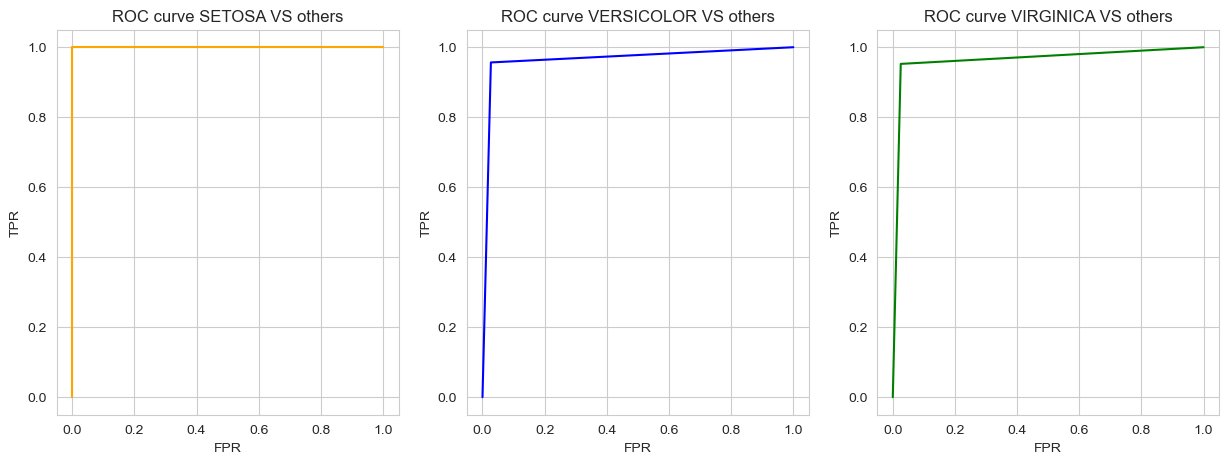

In [150]:
"""
EXERCISE 3-4
View the ROC plot of the best decision tree you trained in exercise # 1.
Compare decision trees and k-nn on the ROC space: 
for which values of (TPR, FPR) k-nn is better than decision trees?
"""
from sklearn import tree
from sklearn.metrics import roc_curve
import numpy as np
iris = load_iris()
# training set = 90 examples
# test set = 0.4 = 60 examples
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

# DECISION TREE CLASSIFIER
clf_decision_tree = tree.DecisionTreeClassifier(criterion="entropy",
                                  random_state=300,
                                  min_samples_leaf=5,
                                  class_weight={0: 1, 1: 1, 2: 1})
clf_decision_tree = clf_decision_tree.fit(X_train, y_train)
predictions = clf_decision_tree.predict(X_test)
print("DECISION TREE CLASSIFIER: TEST SET predictions", predictions)
print("DECISION TREE CLASSIFIER: Test Set Accuracy:" , clf_decision_tree.score(X_test, y_test))
# create 3 subplots (rows = 1, column = 3)
fig2, axs = plt.subplots(1, 3, figsize=(15, 5))

# SETOSA (0)
# classes binarization (1, -1): 
# if class is 0 (setosa) set 1, -1 otherwise
# np.where(y_test == classe, 1, -1)
fpr_setosa, tpr_setosa, _ = roc_curve(np.where(y_test == 0, 1, -1), np.where(predictions == 0, 1, -1))
axs[0].plot(fpr_setosa, tpr_setosa, color='orange')
axs[0].set_title(f'ROC curve SETOSA VS others')
axs[0].set(xlabel='FPR', ylabel='TPR')
    
# VERSICOLOR (1)
# classes binarization: if class is 1 (versicolor) set 1, -1 otherwise
fpr_versicolor, tpr_versicolor, _ = roc_curve(np.where(y_test == 1, 1, -1), np.where(predictions == 1, 1, -1))
axs[1].plot(fpr_versicolor, tpr_versicolor, color='blue')
axs[1].set_title(f'ROC curve VERSICOLOR VS others')
axs[1].set(xlabel='FPR', ylabel='TPR')
    
# VIRGINICA (2)
# classes binarization: if class is 2 (virginica) set 1, -1 otherwise
fpr_virginica, tpr_virginica, _ = roc_curve(np.where(y_test == 2, 1, -1), np.where(predictions == 2, 1, -1))
axs[2].plot(fpr_virginica, tpr_virginica, color='green')
axs[2].set_title(f'ROC curve VIRGINICA VS others')
axs[2].set(xlabel='FPR', ylabel='TPR')

print('--------------------------------------------------------------------------------------------')
# k-NN CLASSIFIER
clf_knn = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf_knn = clf_knn.fit(X_train, y_train)
predictions = clf_knn.predict(X_test)
print("k-NN CLASSIFIER: TEST SET predictions", predictions)
print("k-NN CLASSIFIER: Test Set Accuracy:" , clf_knn.score(X_test, y_test)) # bettern than decision tree
# create 3 subplots (rows = 1, column = 3)
fig2, axs = plt.subplots(1, 3, figsize=(15, 5))

# SETOSA (0)
# classes binarization (1, -1): 
# if class is 0 (setosa) set 1, -1 otherwise
# np.where(y_test == classe, 1, -1)
fpr_setosa, tpr_setosa, _ = roc_curve(np.where(y_test == 0, 1, -1), np.where(predictions == 0, 1, -1))
axs[0].plot(fpr_setosa, tpr_setosa, color='orange')
axs[0].set_title(f'ROC curve SETOSA VS others')
axs[0].set(xlabel='FPR', ylabel='TPR')
    
# VERSICOLOR (1)
# classes binarization: if class is 1 (versicolor) set 1, -1 otherwise
fpr_versicolor, tpr_versicolor, _ = roc_curve(np.where(y_test == 1, 1, -1), np.where(predictions == 1, 1, -1))
axs[1].plot(fpr_versicolor, tpr_versicolor, color='blue')
axs[1].set_title(f'ROC curve VERSICOLOR VS others')
axs[1].set(xlabel='FPR', ylabel='TPR')
    
# VIRGINICA (2)
# classes binarization: if class is 2 (virginica) set 1, -1 otherwise
fpr_virginica, tpr_virginica, _ = roc_curve(np.where(y_test == 2, 1, -1), np.where(predictions == 2, 1, -1))
axs[2].plot(fpr_virginica, tpr_virginica, color='green')
axs[2].set_title(f'ROC curve VIRGINICA VS others')
axs[2].set(xlabel='FPR', ylabel='TPR')